In [ ]:
!pip install -q keras

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/My\ Drive/images.zip > log.log

In [ ]:
classes = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'affenpinscher', 'afghan_hound',
 'african_hunting_dog', 'airedale', 'american_bulldog', 'american_pit_bull_terrier', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'basset_hound',
 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres',
 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever',
 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_cocker_spaniel', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog',
 'german_shepherd', 'german_short-haired_pointer', 'german_shorthaired', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael',
 'havanese', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'irish_water_spaniel', 'irish_wolfhound', 'italian_greyhound', 'japanese_chin', 'japanese_spaniel', 'keeshond', 'kelpie', 'kerry_blue_terrier', 
 'komondor', 'kuvasz', 'labrador_retriever', 'lakeland_terrier', 'leonberg', 'leonberger', 'lhasa', 'malamute', 'malinois', 'maltese_dog', 'mexican_hairless', 'miniature_pinscher', 'miniature_poodle', 
 'miniature_schnauzer', 'newfoundland', 'norfolk_terrier', 'norwegian_elkhound', 'norwich_terrier', 'old_english_sheepdog', 'otterhound', 'papillon', 'pekinese', 'pembroke', 'pomeranian', 'pug',
 'redbone', 'rhodesian_ridgeback', 'rottweiler', 'saint_bernard', 'saluki', 'samoyed', 'schipperke', 'scotch_terrier', 'scottish_deerhound', 'scottish_terrier', 'sealyham_terrier', 'shetland_sheepdog',
 'shiba_inu', 'shih-tzu', 'siberian_husky', 'silky_terrier', 'soft-coated_wheaten_terrier', 'staffordshire_bull_terrier', 'staffordshire_bullterrier', 'standard_poodle', 'standard_schnauzer', 'sussex_spaniel',
 'tibetan_mastiff', 'tibetan_terrier', 'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner', 'welsh_springer_spaniel', 'west_highland_white_terrier', 'wheaten_terrier', 'whippet', 'wire-haired_fox_terrier',
 'yorkshire_terrier']

In [ ]:
num_train_samples = 14999
num_valid_samples = 2607

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import math
# Setar parâmetros
image_size = 224
BATCH_SIZE = 32
num_train_steps = math.floor(num_train_samples/BATCH_SIZE)
num_valid_steps = math.floor(num_valid_samples/BATCH_SIZE)
early_stopping = EarlyStopping(patience=5)
checkpointer = ModelCheckpoint('inception.h5', verbose=1, save_best_only=True)

In [ ]:
from tensorflow.python.keras.applications import InceptionV3
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = len(classes)


base_model = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(299, 299,3))
base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(num_classes, 
                    activation='softmax'))

model = add_model


87916544/87910968 [==============================] - 5s 0us/step


In [ ]:
# train the model on the new data for a few epochs
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
# Carregar o datset ao Keras, sem aumentar e pré-processando

data_generator_no_aug = ImageDataGenerator()
image_size = 299

train_generator = data_generator_no_aug.flow_from_directory(
        'images/train',
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = data_generator_no_aug.flow_from_directory(
        'images/valid',
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical')



Found 14999 images belonging to 143 classes.
Found 2607 images belonging to 143 classes.


In [ ]:
# compile the model (should be done *after* setting layers to non-trainable)
from tensorflow.python.keras.optimizers import Adam

adam = Adam(lr=0.001)

# Compilar o modelo
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Começar o treinamento do modelo.
historico1 = model.fit_generator(
        train_generator,
        steps_per_epoch=num_train_steps,
        callbacks=[early_stopping, checkpointer],
        epochs=5,
        shuffle=True, 
        validation_data=validation_generator,
        validation_steps=num_valid_steps)

Epoch 1/5
467/468 [============================>.] - ETA: 0s - loss: 1.8656 - acc: 0.5765
Epoch 00001: val_loss improved from inf to 0.81375, saving model to inception.h5
468/468 [==============================] - 191s 408ms/step - loss: 1.8635 - acc: 0.5768 - val_loss: 0.8137 - val_acc: 0.7620
Epoch 2/5
467/468 [============================>.] - ETA: 0s - loss: 0.8375 - acc: 0.7552
Epoch 00002: val_loss improved from 0.81375 to 0.73525, saving model to inception.h5
468/468 [==============================] - 179s 381ms/step - loss: 0.8377 - acc: 0.7550 - val_loss: 0.7352 - val_acc: 0.7809
Epoch 3/5
467/468 [============================>.] - ETA: 0s - loss: 0.7201 - acc: 0.7764
Epoch 00003: val_loss improved from 0.73525 to 0.69391, saving model to inception.h5
468/468 [==============================] - 179s 382ms/step - loss: 0.7208 - acc: 0.7762 - val_loss: 0.6939 - val_acc: 0.7901
Epoch 4/5
467/468 [============================>.] - ETA: 0s - loss: 0.6425 - acc: 0.8017
Epoch 00004: v

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


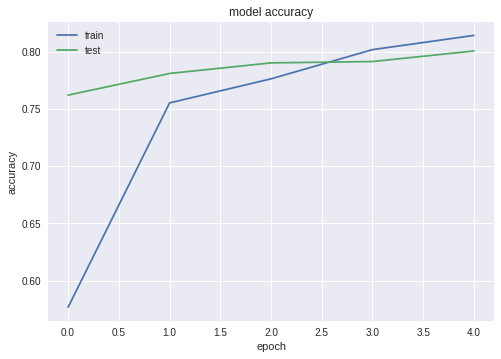

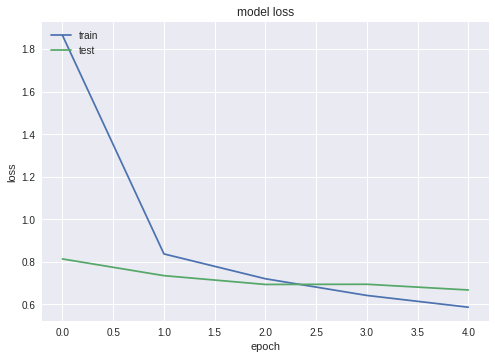

In [ ]:
import matplotlib.pyplot as plt
print(historico1.history.keys())
# summarize history for accuracy
plt.plot(historico1.history['acc'])
plt.plot(historico1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('InceptionV3_fineTune_model_accuracy.png')
plt.show()
# summarize history for loss
plt.plot(historico1.history['loss'])
plt.plot(historico1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('InceptionV3_fineTune_model_loss.png')
plt.show()

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = datagen.flow_from_directory(
        'images/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

validation_generator = data_generator_no_aug.flow_from_directory(
        'images/valid',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 14999 images belonging to 143 classes.
Found 2607 images belonging to 143 classes.


In [ ]:
# compile the model (should be done *after* setting layers to non-trainable)
model.load_weights('inception.h5')
adam = Adam(lr=0.001)

# Compilar o modelo
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Começar o treinamento do modelo.
historico = model.fit_generator(
        train_generator,
        steps_per_epoch=num_train_steps,
        callbacks=[early_stopping, checkpointer],
        epochs=5,
        shuffle=True, 
        validation_data=validation_generator,
        validation_steps=num_valid_steps)

Epoch 1/5
467/468 [============================>.] - ETA: 0s - loss: 1.1204 - acc: 0.6920
Epoch 00001: val_loss improved from 0.66794 to 0.60004, saving model to inception.h5
468/468 [==============================] - 435s 929ms/step - loss: 1.1202 - acc: 0.6920 - val_loss: 0.6000 - val_acc: 0.8152
Epoch 2/5
467/468 [============================>.] - ETA: 0s - loss: 1.0682 - acc: 0.7024
Epoch 00002: val_loss improved from 0.60004 to 0.57773, saving model to inception.h5
468/468 [==============================] - 429s 917ms/step - loss: 1.0683 - acc: 0.7024 - val_loss: 0.5777 - val_acc: 0.8148
Epoch 3/5
467/468 [============================>.] - ETA: 0s - loss: 1.0467 - acc: 0.7092
Epoch 00003: val_loss did not improve from 0.57773
468/468 [==============================] - 429s 916ms/step - loss: 1.0475 - acc: 0.7089 - val_loss: 0.5791 - val_acc: 0.8179
Epoch 4/5
467/468 [============================>.] - ETA: 0s - loss: 1.0138 - acc: 0.7174
Epoch 00004: val_loss did not improve from 0

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


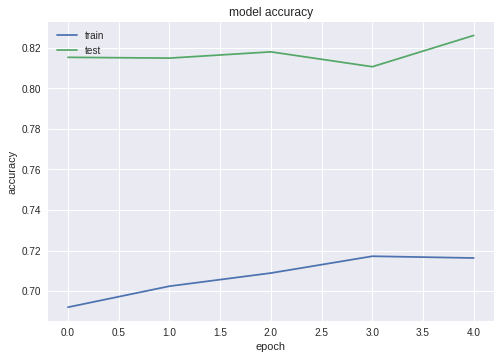

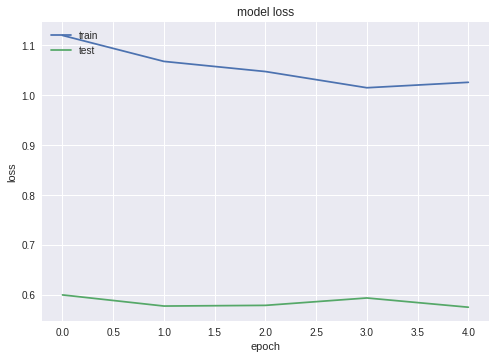

In [ ]:
import matplotlib.pyplot as plt
print(historico.history.keys())
# summarize history for accuracy
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file text file.
uploaded = drive.CreateFile({'title': 'inceptionFineTune.h5'})
uploaded.SetContentFile('inception.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1lKqw7NovEStCKEFlDKpmUvN9MgP-DFFx


In [ ]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np



In [ ]:
link = "https://scontent-gru2-2.cdninstagram.com/vp/6fc82dce56dc981a8ded740bff6ecf01/5C8EDFC8/t51.2885-15/e35/24274410_151090878860722_745083539166330880_n.jpg"
!wget -O img.jpg $link >log.log

--2018-11-27 12:54:23--  https://scontent-gru2-2.cdninstagram.com/vp/6fc82dce56dc981a8ded740bff6ecf01/5C8EDFC8/t51.2885-15/e35/24274410_151090878860722_745083539166330880_n.jpg
Resolving scontent-gru2-2.cdninstagram.com (scontent-gru2-2.cdninstagram.com)... 157.240.12.52, 2a03:2880:f205:2c4:face:b00c:0:43fe
Connecting to scontent-gru2-2.cdninstagram.com (scontent-gru2-2.cdninstagram.com)|157.240.12.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142941 (140K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>] 139.59K   249KB/s    in 0.6s    

2018-11-27 12:54:24 (249 KB/s) - ‘img.jpg’ saved [142941/142941]



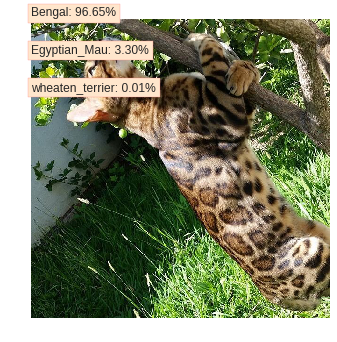

In [ ]:
model.load_weights('inception.h5')
img1 = load_img('img.jpg', target_size=(299, 299))
img2 = load_img('img.jpg')
x = img_to_array(img1)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
top = preds[0].argsort()[-3:][::-1]
plt.imshow(img2)
plt.axis('off')
px=0
for i in top:
  plt.text(0.1, 0.2+px, classes[i]+': ' + "%.2f" % (preds[0][i]*100)+'%', size=12,
         ha="left", va="bottom",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.9, 0.8),
                   )
         )
  px+=80
  